<div style="text-align:center">
    <h1>
        SARSA
    </h1>
</div>

<br><br>

<div style="text-align:center">
    We are going to implement a method that learns from experience and uses bootstrapping.
    It is known as SARSA because of the elements involved in the update rule:
</div>

\begin{equation}
\text{State}_t, \text{Action}_t, \text{Reward}_t, \text{State}_{t+1}, \text{Action}_{t+1}
\end{equation}

<br>

<div style="text-align:center">
    This method follows an on-policy strategy, in which the same policy that is optimized is responsible for scanning the environment.
</div>

## Import the necessary software libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

## Create the environment, value table and policy

#### Create the environment

In [2]:
env = Maze()

#### Create the $Q(s, a)$ table

In [3]:
action_values = np.zeros(shape=(5, 5, 4))

#### Create the policy $\pi(s)$

In [4]:
def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

#### Plot the value table $Q(s,a)$

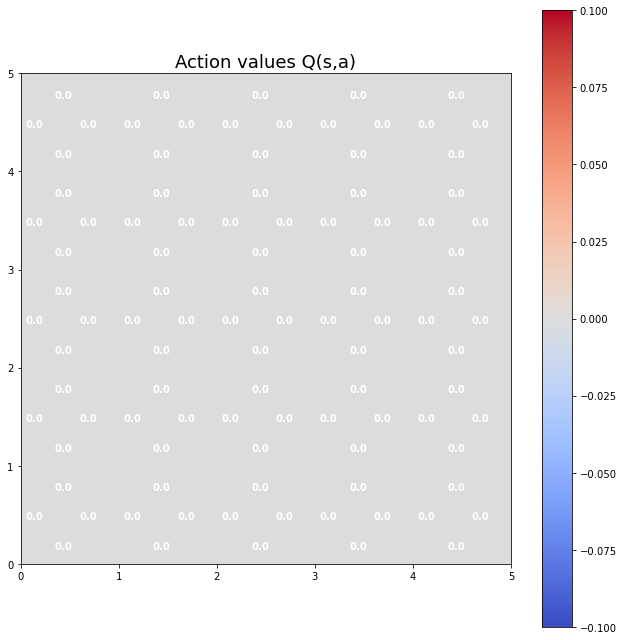

In [5]:
plot_action_values(action_values)

#### Plot the policy

2022-08-25 07:26:01.300 python[1396:37290] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fa0e4a9c240>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-08-25 07:26:01.301 python[1396:37290] Warning: Expected min height of view: (<NSButton: 0x7fa0d4e13800>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-08-25 07:26:01.303 python[1396:37290] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fa0d4e13cc0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-08-25 07:26:01.304 python[1396:37290] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fa0d4e14e30>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


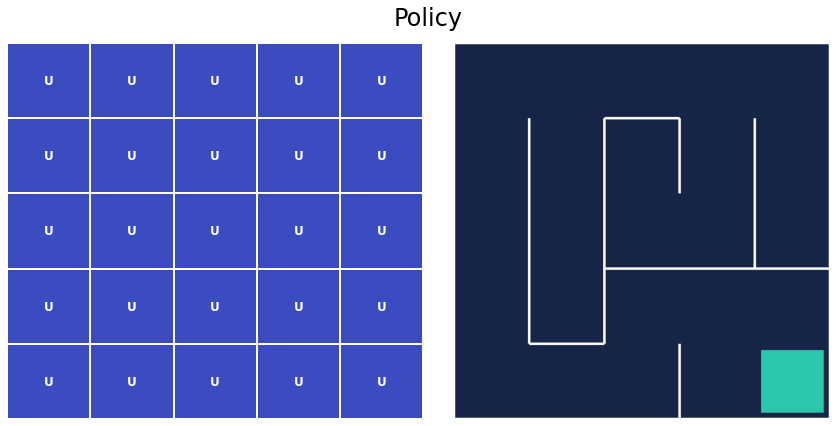

In [6]:
plot_policy(action_values, env.render(mode='rgb_array'))

## Implement the algorithm

</br>



<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [7]:
def sarsa(action_values, policy, episodes, alpha=0.1, gamma=0.99, epsilon=0.2):
    
    for episode in range(1, episodes + 1):
        state = env.reset()
        action = policy(state, epsilon)
        done = False
        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = policy(next_state, epsilon)
            
            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
            state = next_state
            action = next_action

In [ ]:
sarsa(action_values, policy, 10000)

## Show results

#### Show resulting value table $Q(s,a)$

In [ ]:
plot_action_values(action_values)

#### Show resulting policy $\pi(\cdot|s)$

In [ ]:
plot_policy(action_values, env.render(mode='rgb_array'))

#### Test the resulting agent

In [ ]:
test_agent(env, policy)